### Data analysis

This is a document for analysis the stupid model solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

### Dumb solution

#### Environment:

time-window: 180   
cool-down: 15 (30, 45, 60)   

traffic-flow: NS 10%  EW 25%   

cars: speed-limit 5 max-brake 3 max-accel 3   

random-swith? Y or N    
switch-probability 25 (50 75)   

In [13]:
csv = pd.read_csv("./experiment_stupid_signal-table.csv")
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   [run number]             2400 non-null   int64  
 1   max-accel                2400 non-null   int64  
 2   initial-tips             2400 non-null   int64  
 3   waiting-cost             2400 non-null   int64  
 4   traffic-flow-from-south  2400 non-null   int64  
 5   switch-probability       2400 non-null   int64  
 6   signal-NS?               2400 non-null   bool   
 7   speed-limit              2400 non-null   int64  
 8   traffic-flow-from-east   2400 non-null   int64  
 9   cool-down                2400 non-null   int64  
 10  traffic-flow-from-west   2400 non-null   int64  
 11  time-window              2400 non-null   int64  
 12  random-switch?           2400 non-null   bool   
 13  traffic-flow-from-north  2400 non-null   int64  
 14  max-brake               

In [25]:
csv_sub = csv.drop(['[run number]', 'max-accel', 'initial-tips', 'waiting-cost', 'traffic-flow-from-south', 'traffic-flow-from-east', 'traffic-flow-from-west', 'traffic-flow-from-north', 
                     'max-brake', '[step]', 'time-window', 'speed-limit', 'signal-NS?', ], axis=1)
csv_sub.rename(columns=lambda x: x.replace("-", "_"), inplace=True)
csv_sub.rename(columns=lambda x: x.replace("?", ""), inplace=True)
csv_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   switch_probability  2400 non-null   int64  
 1   cool_down           2400 non-null   int64  
 2   random_switch       2400 non-null   bool   
 3   average_speed       2400 non-null   float64
 4   average_wait        2400 non-null   float64
 5   average_drive       2400 non-null   float64
 6   pass_car            2400 non-null   int64  
dtypes: bool(1), float64(3), int64(3)
memory usage: 115.0 KB


In [26]:
csv_cd15 = csv_sub.query("cool_down==15 & random_switch==False")
csv_cd15.head()

,switch_probability,cool_down,random_switch,average_speed,average_wait,average_drive,pass_car
100,25,15,False,3.176605,3.463636,4.200000,110
101,25,15,False,2.745683,4.866071,4.437500,112
102,25,15,False,2.485549,5.230769,4.721154,104
103,25,15,False,2.998799,3.631148,4.467213,122
104,25,15,False,2.640373,4.968000,4.616000,125


In [31]:
average_speed_mean = csv_cd15['average_speed'].mean()
average_wait_mean = csv_cd15['average_wait'].mean()
average_drive_mean = csv_cd15['average_drive'].mean()
pass_car_mean = csv_cd15['pass_car'].mean()


print("pass_car mean:", pass_car_mean)
print("average_wait mean:", average_wait_mean)
print("average_drive mean:", average_drive_mean)
print("average_speed mean:", average_speed_mean)

pass_car mean: 120.19333333333333
average_wait mean: 4.2517575918366655
average_drive mean: 4.381012889460001
average_speed mean: 2.900626862136667


### QLearning solution

In [2]:
csv_ql = pd.read_csv("./model_v3 Ave Reward Per Episode.csv")
csv_ql.head()

,y
0,1.051438
1,0.354074
2,1.226588
3,0.638977
4,0.475955


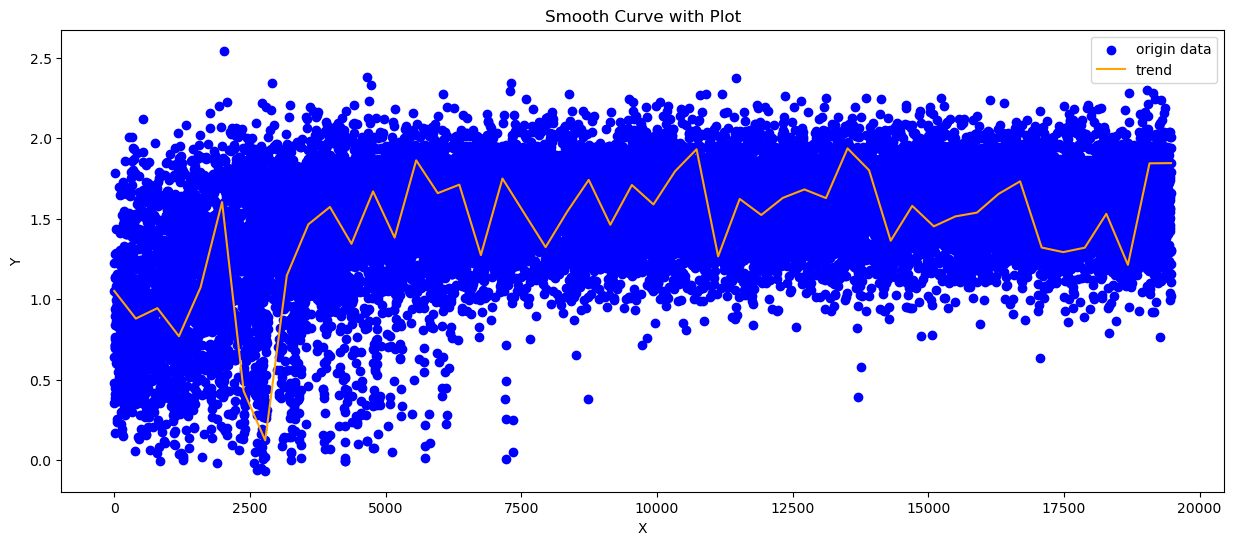

In [23]:
y_data = csv_ql['y']

x_data = range(len(y_data))
x_new = np.linspace(min(x_data), max(x_data), 50)

spl = make_interp_spline(x_data, y_data)
y_smooth = spl(x_new)


plt.figure(figsize=(15, 6))

plt.scatter(x_data, y_data, color='blue', label='origin data')
plt.plot(x_new, y_smooth, color='orange', label='trend')
#plt.fill_between(x_new, y_smooth, y_data.max(), color='orange', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Curve with Plot')
plt.legend()
plt.show()

In [8]:
csv_ql = pd.read_csv("./model_v3 experiment1-table.csv")
csv_ql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697849 entries, 0 to 5697848
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   [run number]             int64  
 1   cool-down                int64  
 2   max-accel                int64  
 3   traffic-flow-from-west   int64  
 4   bonus-delay              int64  
 5   initial-tips             int64  
 6   time-window              int64  
 7   wait-cost                int64  
 8   traffic-flow-from-south  int64  
 9   traffic-flow-from-north  int64  
 10  signal-NS?               bool   
 11  speed-limit              int64  
 12  max-brake                int64  
 13  traffic-flow-from-east   int64  
 14  [step]                   int64  
 15  reward                   float64
 16  pass-car                 int64  
 17  average-speed            float64
 18  average-wait             float64
 19  average-drive            float64
dtypes: bool(1), float64(4), int64(15)
memory usage

In [15]:
column_mapping = {
    '[run number]': 'run_number',
    'cool-down': 'cool_down',
    'max-accel': 'max_accel',
    'traffic-flow-from-west': 'traffic_flow_from_west',
    'bonus-delay': 'bonus_delay',
    'initial-tips': 'initial_tips',
    'time-window': 'time_window',
    'wait-cost': 'wait_cost',
    'traffic-flow-from-south': 'traffic_flow_from_south',
    'traffic-flow-from-north': 'traffic_flow_from_north',
    'signal-NS?': 'signal_NS',
    'speed-limit': 'speed_limit',
    'max-brake': 'max_brake',
    'traffic-flow-from-east': 'traffic_flow_from_east',
    '[step]': 'step',
    'pass-car': 'pass_car',
    'average-speed': 'average_speed',
    'average-wait': 'average_wait',
    'average-drive': 'average_drive'
}


csv_ql = csv_ql.rename(columns=column_mapping)
csv_ql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697849 entries, 0 to 5697848
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   run_number               int64  
 1   cool_down                int64  
 2   max_accel                int64  
 3   traffic_flow_from_west   int64  
 4   bonus_delay              int64  
 5   initial_tips             int64  
 6   time_window              int64  
 7   wait_cost                int64  
 8   traffic_flow_from_south  int64  
 9   traffic_flow_from_north  int64  
 10  signal_NS                bool   
 11  speed_limit              int64  
 12  max_brake                int64  
 13  traffic_flow_from_east   int64  
 14  step                     int64  
 15  reward                   float64
 16  pass_car                 int64  
 17  average_speed            float64
 18  average_wait             float64
 19  average_drive            float64
dtypes: bool(1), float64(4), int64(15)
memory usage

In [23]:
csv_ql_b1 = csv_ql.query("run_number==1").sort_values('step', ascending=True)
csv_ql_b1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149646 entries, 0 to 5697847
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   run_number               int64  
 1   cool_down                int64  
 2   max_accel                int64  
 3   traffic_flow_from_west   int64  
 4   bonus_delay              int64  
 5   initial_tips             int64  
 6   time_window              int64  
 7   wait_cost                int64  
 8   traffic_flow_from_south  int64  
 9   traffic_flow_from_north  int64  
 10  signal_NS                bool   
 11  speed_limit              int64  
 12  max_brake                int64  
 13  traffic_flow_from_east   int64  
 14  step                     int64  
 15  reward                   float64
 16  pass_car                 int64  
 17  average_speed            float64
 18  average_wait             float64
 19  average_drive            float64
dtypes: bool(1), float64(4), int64(15)
memory usage: 483

In [25]:
csv_ql_b1_sub = csv_ql_b1.drop(["cool_down", "max_accel", "traffic_flow_from_west", "initial_tips", "time_window", "wait_cost", "traffic_flow_from_south", "traffic_flow_from_north", "signal_NS", 
                      "speed_limit", "max_brake", "traffic_flow_from_east", ], axis=1).reset_index(drop=True)
csv_ql_b1_sub.info()
csv_ql_b1_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149646 entries, 0 to 3149645
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   run_number     int64  
 1   bonus_delay    int64  
 2   step           int64  
 3   reward         float64
 4   pass_car       int64  
 5   average_speed  float64
 6   average_wait   float64
 7   average_drive  float64
dtypes: float64(4), int64(4)
memory usage: 192.2 MB


,run_number,bonus_delay,step,reward,pass_car,average_speed,average_wait,average_drive
0,1,1,0,0.0,0,0.0,0.0,0.0
1,1,1,1,0.0,0,0.0,0.0,0.0
2,1,1,2,0.0,0,0.0,0.0,0.0
3,1,1,3,0.0,0,0.0,0.0,0.0
4,1,1,4,0.0,0,0.0,0.0,0.0


In [30]:
plt.scatter(csv_ql_b1_sub['step'], csv_ql_b1_sub['reward'])

TypeError: 'RangeIndex' object is not callable

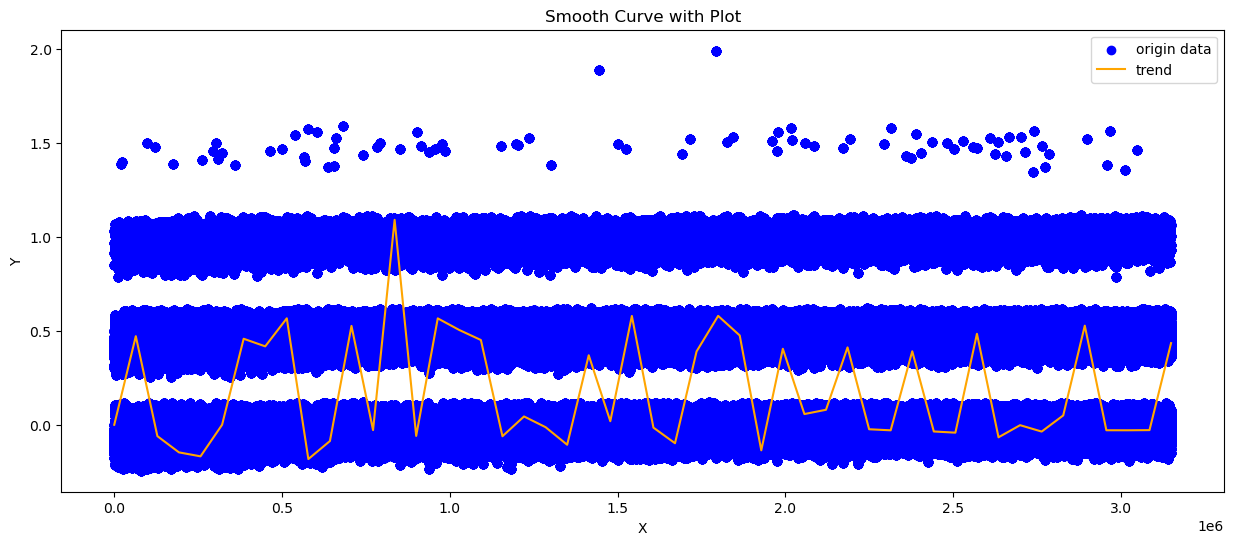

In [26]:
y_data = csv_ql_b1_sub['reward']

x_data = range(len(y_data))
x_new = np.linspace(min(x_data), max(x_data), 50)

spl = make_interp_spline(x_data, y_data)
y_smooth = spl(x_new)


plt.figure(figsize=(15, 6))

plt.scatter(x_data, y_data, color='blue', label='origin data')
plt.plot(x_new, y_smooth, color='orange', label='trend')
#plt.fill_between(x_new, y_smooth, y_data.max(), color='orange', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Curve with Plot')
plt.legend()
plt.show()

environment:   
time-window: 180   
cool-down: 15   

traffic flow: NS 10% EW 25%   

cars: speed-limit 5 max-brake 3 max-accel 3   

bonus-delay 3

**Result**

|name|value|
|--|--|
|pass-car|132|     
|average-wait|5.303030303030303|     
|average-drive|4.363636363636363|     
|average-speed|2.8787667034933926|     

#### Q table sample


[1.0, 0.0, 7.0, 0.0] -> -19.06206560420644 / -16.496870056253155   
[0.0, 3.0, 0.0, 2.0] -> -12.619549672487661 / -33.61444574717617   
[5.0, 0.0, 4.0, 0.0] -> -38.65093838879212 / -17.19508267414104   
[0.0, 3.0, 0.0, 4.0] -> -27.962340512017846 / -45.48962393049666   
[0.0, 3.0, 0.0, 0.0] -> -2.2321796150464053 / -20.199679304398913   
[0.0, 3.0, 0.0, 8.0] -> -99.84753616947685 / -73.7917037245436   
[0.0, 8.0, 0.0, 0.0] -> -27.461699999999997 / -14.824444444444442   
[8.0, 0.0, 4.0, 0.0] -> -63.81606235090793 / -60.51257010238837   
[0.0, 1.0, 0.0, 3.0] -> -7.082286068907393 / -33.76942729012743   
[0.0, 1.0, 1.0, 2.0] -> 0.9177777777777779 / 0.0   
[5.0, 0.0, 9.0, 0.0] -> -20.882404293333334 / -18.721791666666668   
[3.0, 0.0, 5.0, 0.0] -> -28.48628947624758 / -15.886028687758074   
[7.0, 0.0, 2.0, 0.0] -> -28.46876289131643 / -26.52437684656865   
[2.0, 0.0, 3.0, 0.0] -> -23.09135832507939 / -21.80553092977882   
[0.0, 0.0, 0.0, 7.0] -> -14.9967335 / -17.67510888888889   
[6.0, 0.0, 0.0, 0.0] -> -7.698424773400194 / -8.323185836   
[0.0, 8.0, 0.0, 6.0] -> -129.20158081192963 / -136.5098288879756   
[1.0, 0.0, 1.0, 0.0] -> -2.601149634640937 / -10.000869767690666   
[0.0, 8.0, 0.0, 2.0] -> -56.44981129064721 / -59.956207199569505   
[0.0, 8.0, 0.0, 8.0] -> -157.14446337708102 / -249.6502936829875   
[0.0, 1.0, 0.0, 1.0] -> -3.3700683678022267 / -17.94532068190407   
[9.0, 0.0, 6.0, 0.0] -> -23.059407320261435 / -30.229965850000003   
[4.0, 0.0, 7.0, 0.0] -> -42.999587360635005 / -31.972086569411054   
[0.0, 8.0, 0.0, 4.0] -> -121.01525222104928 / -102.39840155537576   
[7.0, 0.0, 5.0, 0.0] -> -48.38590551747796 / -42.943167453380646   
[9.0, 0.0, 9.0, 0.0] -> -55.20802736842106 / -72.80097918128655   
[0.0, 5.0, 0.0, 7.0] -> -86.08245373798223 / -73.43450052442468   
[0.0, 5.0, 0.0, 5.0] -> -54.4241710109633 / -42.57360528514572   